# Bitcoin Investment Report

## 1.0 Executive Summary

For the analysis of Bitcoin, the historic prices of Bitcoin, S&P 500 and gold were utilized. The historic price evaluation included price through time, price drawdown, the cumulative returns of each asset, and finally the calculation of the Sharpe and Sortino ratios to evaluate the risk adjusted returns of each. The volatility of each asset was then evaluated by analyzing the distributions of the returns as well as observing the returns through time. These two analyses showed that the returns of an investment in Bitcoin can have significant returns, however it also includes significant risk. Furthermore, the risk profile of Bitcoin indicates the returns are subject to infrequent and extreme deviations. This elevated risk of Bitcoin historically has proven to be worth the returns that have been experienced. This would suggest that based on the historic performance of Bitcoin could help boast the performance of a portfolio if the increased risk is appropriate and aligned with the overall portfolio risk tolerance. In addition to the boost in performance Bitcoin could also be viable as a hedge versus inflation. This is likely due to the magnitude of returns, the historic price profile does not appear to follow typical trends of market stresses as seen in the comparison of the S&P 500 and Bitcoin throughout 2020, and finally due to the finite nature of Bitcoin.

Various portfolios were then created and evaluated with varying weights of each of the assets. Of the 4 portfolios (Max Sharpe, Max Sharpe - Downside, Minimum Volatility, and Minimum Volatility - Downside) the recommendation based on the findings of this report is the Minimum Volatility portfolio. This portfolio only includes investment in S&P 500 at 54.6% and gold at 45.4%. The portfolio had an expected return of 10.7%, and an annual volatility of 6.5%. The Sharpe Ratio of this portfolio is 1.33 indicating that the risk incorporated in the portfolio is worth the returns expected of the portfolio. Evaluating the start point impacts of the historic prices incorporated in the analysis showed that for the recommended portfolio the cumulative returns follow an expected trend of consistently increasing with increasing number of years of the investment. A driver of this observation was showed to likely be tied to the portfolio not incorporating Bitcoin, and as a result not incorporating the significant increase in price observed historically which may not continue to occur moving into the future.


## 2.0 Background
Bitcoin and the larger cryptocurrency landscape has gained the attention of investors. However, due how recent this landscape is and how fast changing it is a major consideration has to be whether these historic returns represent good long term investments.

The questions of focus in the report are:

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Do you believe Bitcoin could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

## 3.0 Environment Setup

### 3.1 Library Import

In [164]:
# Import Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

%matplotlib inline

## 4.0 Data Import

### 4.1 Bitcoin daily data in US dollars

In [165]:
# Read in data
bitcoin = pd.read_csv('./data/bitcoin-usd.csv'
                        , parse_dates=['date']
                        , index_col='date')
# Closing Price Return
bitcoin['return'] = bitcoin['close'].pct_change().mul(100)

#### 4.1.1 Data Descriptions
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

Add 'return' field - calculated percent change as percentage of closing price

### 4.2 S&P 500 daily data

In [215]:
sp500 = pd.read_csv('./data/sp500.csv'
                    , parse_dates=['date']
                    , index_col='date')

sp500['return'] = sp500['close'].pct_change().mul(100)

#### 4.2.1 Data Descriptions
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

Add 'return' field - calcuated percent channge as percentage of closing price

### 4.3 Inflation and gold as monthly data

In [216]:
monthly_data = pd.read_csv('./data/monthly_data.csv'
                            , parse_dates=['date']
                            , index_col='date')
monthly_data['return'] = monthly_data['gold_usd'].pct_change().mul(100)
monthly_data['inf_rate'] = monthly_data['cpi_us'].pct_change()

#### 4.3.1 Data Descriptions
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

Add 'retrun' field - calculated percent change as percentage of gold_usd

## 5.0 Asset Performance Comparison

### 5.1 Price Analysis
The below plot show the daily closing price of Bitcoin, S&P500, the monthly price of gold, and the monthly consumer price index.

It can be seen that the price of Bitcoin has increased significantly more during the time period of interest when compared to the closing price of the S&P500 and the monthly price of gold.

The closing price of the S&P500 experienced a distinctive drop early in 2020, this drop in price is not observed in the closing price of Bitcoin or in the monthly price of gold. This could suggest that like gold the price of Bitcoin is more stable during, or not as responsive to tradition external market stress (e.g. economic impact of COVID-19 in early 2020).

The price increase in Bitcoin may appear appealing, however, the volatitly of the price is an important consideration. There is a significant drop in the closing price observed in mid-2020, that may not appear to be as drastic as the drop in the S&P500 observed early 2020, however this drop in Bitcoin price represents approximately a 45% decrease.

**Bitcoin Closing Price Observations:**
>Investment in Bitcoin appears appealing due to the historic trend in closing price. The historic trends suggest that Bitcoin may  not be as responsive to the overall market factors which resulted in the sharp drop in price of the S&P500 seen in early 2020.

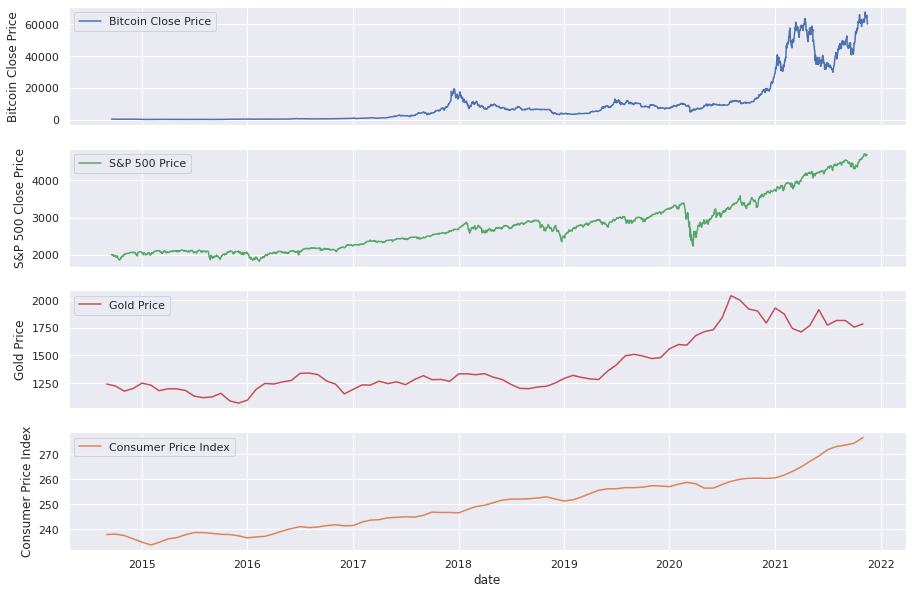

In [168]:
fig, axes = plt.subplots(4, 1, figsize=(15,10), sharex=True)
sns.set_style('darkgrid')

bitcoin_close_plot = sns.lineplot(data=bitcoin, x='date', y='close', color='#4C72B0', ax=axes[0], legend='auto')
bitcoin_close_plot.set(ylabel='Bitcoin Close Price')
bitcoin_close_plot.legend(['Bitcoin Close Price'])

sp500_close_plot = sns.lineplot(data=sp500, x='date', y='close', color='#55A868', ax=axes[1])
sp500_close_plot.set(ylabel='S&P 500 Close Price')
sp500_close_plot.legend(['S&P 500 Price'])

gold_price_plot = sns.lineplot(data=monthly_data, x='date', y='gold_usd', color='#C44E52', ax=axes[2])
gold_price_plot.set(ylabel='Gold Price')
gold_price_plot.legend(['Gold Price'])

cpi = sns.lineplot(data=monthly_data, x='date', y='cpi_us', color='#DD8452', ax=axes[3])
cpi.set(ylabel='Consumer Price Index')
cpi.legend(['Consumer Price Index'])

### 5.2 Price Drawdown

The drawdown plots show that relative to the S&P 500 Bitcoin experiences more frequent and more extreme drawdowns throughout the time period of interest. It also indicates that recovery from some of the drawdowns can extend several months to more than a year, whereas the recoveries for the S&P 500 are less extreme and the recovery periods typically shorter.

Text(2020-03-23 00:00:00, -0.36924960002653273, 'S&P 500 Max Drawdown -33.9%')

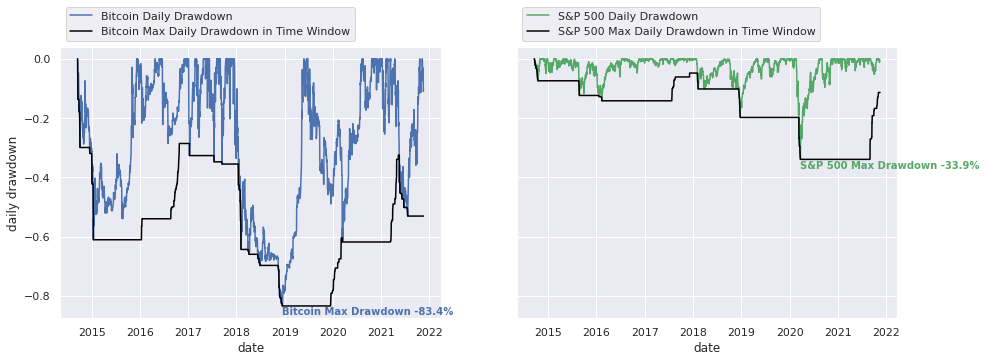

In [214]:
def daily_max_drawdown(prices, window):
    rolling_max = prices.rolling(center=False, min_periods=1, window=window).max()
    daily_drawdown = (prices / rolling_max) - 1
    max_daily_drawdown = daily_drawdown.rolling(center=False, min_periods=1, window=window).min()
    return daily_drawdown, max_daily_drawdown

sp_daily_drawdown, sp_max_daily_drawdown = daily_max_drawdown(sp500['close'], window=365)
sp_drawdown = sp_daily_drawdown.to_frame('daily')
sp_drawdown['max_daily'] = sp_max_daily_drawdown.to_frame('max_daily')

bit_daily_drawdown, bit_max_daily_drawdown = daily_max_drawdown(bitcoin['close'], window=365)
bit_drawdown = bit_daily_drawdown.to_frame('daily')
bit_drawdown['max_daily'] = bit_max_daily_drawdown.to_frame('max_daily')

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
bit_drawdown_plot = sns.lineplot(data=bit_drawdown, x='date', y='daily', color='#4C72B0', ax=axes[0])
bit_drawdown_plot = sns.lineplot(data=bit_drawdown, x='date', y='max_daily', color='black', ax=axes[0])
bit_drawdown_plot.legend(['Bitcoin Daily Drawdown', 'Bitcoin Max Daily Drawdown in Time Window'], loc='lower left', bbox_to_anchor=(0, 1))
bit_drawdown_plot.set_ylabel('daily drawdown')
bit_drawdown_plot.text(bit_drawdown['max_daily'].idxmin(), bit_drawdown['max_daily'].min()-0.03, f'Bitcoin Max Drawdown {round(bit_drawdown["max_daily"].min()*100,1)}%', size='small', color='#4C72B0', weight='semibold')

sp_drawdown_plot = sns.lineplot(data=sp_drawdown, x='date', y='daily', color='#55A868', ax=axes[1])
sp_drawdown_plot = sns.lineplot(data=sp_drawdown, x='date', y='max_daily', color='black', ax=axes[1])
sp_drawdown_plot.legend(['S&P 500 Daily Drawdown', 'S&P 500 Max Daily Drawdown in Time Window'], loc='lower left', bbox_to_anchor=(0, 1))
sp_drawdown_plot.text(sp_drawdown['max_daily'].idxmin(), sp_drawdown['max_daily'].min()-0.03, f'S&P 500 Max Drawdown {round(sp_drawdown["max_daily"].min()*100,1)}%', size='small', color='#55A868', weight='semibold')

### 5.3 Cumulative Returns

The below plot of the cumulative returns for Bitcoin, S&P500, and gold again demonstrate the vast difference in performance of the assets of interest during the time period of interest.

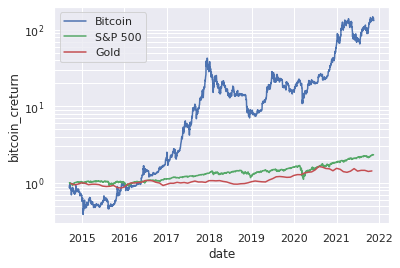

In [170]:
cumulative_returns = pd.DataFrame(columns=('bitcoin_creturn', 'sp500_creturn', 'gold_creturn'))
cumulative_returns['bitcoin_creturn'] = (1 + bitcoin['close'].pct_change()).cumprod()
cumulative_returns['sp500_creturn'] = (1 + sp500['close'].pct_change()).cumprod()
cumulative_returns['gold_creturn'] = (1 + monthly_data['gold_usd'].pct_change()).cumprod()


g = sns.lineplot(data=cumulative_returns, x='date', y='bitcoin_creturn', color='#4C72B0')
g = sns.lineplot(data=cumulative_returns, x='date', y='sp500_creturn', color='#55A868')
g = sns.lineplot(data=cumulative_returns, x='date', y='gold_creturn', color='#C44E52')
g.set(yscale='log')
g.grid(True, which='both')
plt.legend(labels=['Bitcoin', 'S&P 500', 'Gold'])

### 5.4 Risk Adjusted Returns

#### Sharpe Ratio & Sortino Ratio

The Sharpe ratio can be used to evaluate risk adjusted returns, and the ratio is a measure of excess return over a risk-free alternative. A Sharpe ratio of 1.0 indicates that returns of an investment are proportional to the risk of the investment. Of the three assets under consideration Bitcoin has the greatest Sharpe ratio of 1.298, followed by the S&P 500 with a ratio of 0.704, and lastly gold with a ratio of 0.412.

Although previous analysis has showed that the volatility of Bitcoin would make it a riskier investment the Sharpe ratio > 1.0 would indicate that the returns experienced by Bitcoin during the time period of interest are greater than the associated risk. Whereas, both returns of the S&P 500 and gold have Sharpe ratio < 1.0 indicating that the returns seen are less than the risk associated with the investment.

In [171]:
def sharpe(prices, num_of_months, T, rfr):
    total_return = (prices[-1] - prices[0]) / prices[0]
    annualized_return = ((1 + total_return)**(12/num_of_months)) - 1
    annualized_vol = prices.pct_change().std() * np.sqrt(T)
    sharpe_ratio = (annualized_return - rfr) / annualized_vol
    
    return sharpe_ratio

def sortino(returns, target_return, rfr):
    downside_returns = returns.loc[returns < target_return]
    expected_return = returns.mean()
    downside_std = downside_returns.std()
    sortino_ratio = (expected_return - rfr) / downside_std

    return sortino_ratio

#Bitcoin Calculations
bit_sharpe = round(sharpe(bitcoin['close'], 86.56, 365, 0.0),3)
bit_sortino = round(sortino(bitcoin['return'], 0.0, 0.0),3)
#S&P 500 Calculations
sp_sharpe = round(sharpe(sp500['close'], 86.56, 250, 0.0),3)
sp_sortino = round(sortino(sp500['return'], 0.0, 0.0),3)
#Gold Calculation
g_sharpe = round(sharpe(monthly_data['gold_usd'], 86.56, 12, 0.0),3)
g_sortino = round(sortino(monthly_data['return'], 0.0, 0.0), 3)

print(f"The sharpe ratio of bitcoin is {bit_sharpe} and the sortino ratio is {bit_sortino}.\nThe sharpe ratio of sp500 is {sp_sharpe} and the sortino ratio is {sp_sortino}.\nThe sharpe ratio of gold is {g_sharpe} and the sortino ratio is {g_sortino}.")


The sharpe ratio of bitcoin is 1.298 and the sortino ratio is 0.088.
The sharpe ratio of sp500 is 0.704 and the sortino ratio is 0.055.
The sharpe ratio of gold is 0.412 and the sortino ratio is 0.247.


## 6.0 Volatility Analysis

The below charts indicate that Bitcoin daily returns are highly volatile when compared to S&P 500 daily returns. Bitcoin returns are also more volatile than the monthly price of gold, however the price of gold is more volatile than the daily returns of the S&P500.

The volatility can be described with the standard deviation of the returns. The standard deviation of Bitcoin, S&P500, and gold are 3.902, 1.124, 0.3.617, respectively. The standard deviation show that Bitcoin is the most volatile, followed by the price of gold, and lastly the S&P500.

The skewness of the return distribution can be a helpful metric in determining how symmetric the distribution is, as well as evaluate the potential for skewness risk when a financial model may assume a normal distribution. The skewness measures for Bitcoin, S&P500 and gold are -0.16, -0.67, and 0.289, respectively. Both Bitcoin and gold fall within the range of -0.5 to 0.5 and can be thought of as approximately normal. The skewness of the S&P500 indicates a moderately skewed distribution. The S&P500 has a negative skewness indicating investment returns is likely to have many small positive gains and few large losses, this overall trend is also observed in the daily price data.  

Like skewness, kurtosis can be a helpful measure is evaluating the occurrence of extreme values. The kurtosis values for Bitcoin, S&P500, and gold are 7.379, 19.658, 0.252. The kurtosis values of both Bitcoin and the S&P 500 are high values (i.e. high relative to a normal distribution: kurtosis = 3), this is undesirable and indicates that the variance in returns (positive or negative) is due to infrequent extreme deviation from the mean. The kurtosis value of the price of gold is a low value indicating returns are more likely to be concentrated around the mean.

**Bitcoin Volatility Observations**
>Incorporating Bitcoin into a portfolio, based on historic trends, is likely to improve portfolio performance. However, the grained performance comes with an increased risk and a key question to address is if the risk is worth the added performance and is it consistent with the desired risk level of the portfolio.  
The below plots show the volatility of Bitcoin, which can be generally characterized by be highly volatile and subject to infrequent extreme deviation from its overall mean return for the time period of interest, however provided that the distribution is approximately normal these deviations have a similar likelihood to be positive or negative. The maximum positive daily return during the time period of interest was 25.2% and the maximum negative daily return was -37.2%.


Text(0, 0.5, 'Returns [%]')

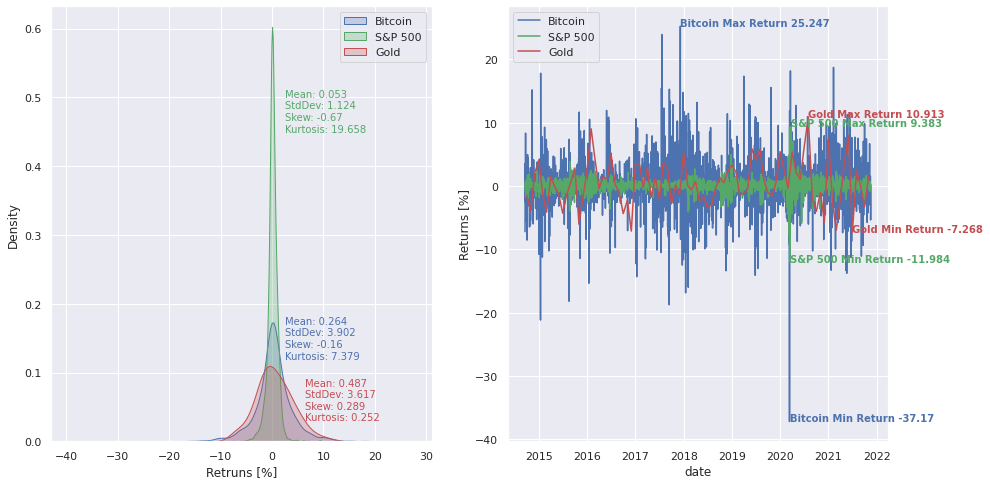

In [172]:
sns.set(style='darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15,8))

kde_plot = sns.kdeplot(data=bitcoin, x ='return', color='#4C72B0', alpha=0.25, ax=axes[0], shade=True)
kde_plot = sns.kdeplot(data=sp500, x='return', color='#55A868', alpha = 0.25, ax=axes[0], shade=True)
kde_plot = sns.kdeplot(data=monthly_data, x='return', color='#C44E52', alpha = 0.25, ax=axes[0], shade=True)
kde_plot.legend(['Bitcoin', 'S&P 500', 'Gold'])
kde_plot.set_xlabel('Retruns [%]')
kde_plot.text(2.5, 0.12, f'Mean: {round(bitcoin["return"].mean(),3)}\nStdDev: {round(bitcoin["return"].std(),3)}\nSkew: {round(bitcoin["return"].skew(),3)}\nKurtosis: {round(bitcoin["return"].kurtosis(),3)}', size='small', color='#4C72B0')
kde_plot.text(2.5, 0.45, f'Mean: {round(sp500["return"].mean(),3)}\nStdDev: {round(sp500["return"].std(),3)}\nSkew: {round(sp500["return"].skew(),3)}\nKurtosis: {round(sp500["return"].kurtosis(),3)}', size='small', color='#55A868')
kde_plot.text(6.5, 0.03, f'Mean: {round(monthly_data["return"].mean(),3)}\nStdDev: {round(monthly_data["return"].std(),3)}\nSkew: {round(monthly_data["return"].skew(),3)}\nKurtosis: {round(monthly_data["return"].kurtosis(),3)}', size='small', color='#C44E52')


line_plot = sns.lineplot(data=bitcoin, x='date', y='return', color='#4C72B0', ax=axes[1])
line_plot = sns.lineplot(data=sp500, x='date', y='return', color='#55A868', ax=axes[1])
line_plot = sns.lineplot(data=monthly_data, x='date', y='return', color='#C44E52',ax=axes[1])
line_plot.legend(labels=['Bitcoin', 'S&P 500', 'Gold'], loc='upper left')

line_plot.text(bitcoin['return'].idxmax(), bitcoin['return'].max(), f'Bitcoin Max Return {round(bitcoin["return"].max(),3)}', size='small', color='#4C72B0', weight='semibold')
line_plot.text(sp500['return'].idxmax(), sp500['return'].max(), f'S&P 500 Max Return {round(sp500["return"].max(),3)}', size='small', color='#55A868',  weight='semibold')
line_plot.text(monthly_data['return'].idxmax(), monthly_data['return'].max(), f'Gold Max Return {round(monthly_data["return"].max(),3)}', size='small', color='#C44E52',  weight='semibold')

line_plot.text(bitcoin['return'].idxmin(), bitcoin['return'].min(), f'Bitcoin Min Return {round(bitcoin["return"].min(),3)}', size='small', color='#4C72B0', weight='semibold')
line_plot.text(sp500['return'].idxmin(), sp500['return'].min(), f'S&P 500 Min Return {round(sp500["return"].min(),3)}', size='small', color='#55A868',  weight='semibold')
line_plot.text(monthly_data['return'].idxmin(), monthly_data['return'].min(), f'Gold Min Return {round(monthly_data["return"].min(),3)}', size='small', color='#C44E52',  weight='semibold')
line_plot.set_ylabel('Returns [%]')

## 7.0 Portfolio Optimization

### 7.1 Porfolio Generation

Four portfolios were generated and considered, all portfolios used exponentially weighted risk and return
* Max Sharpe
* Minimum Volatility
* Max Share - Downside Risk
* Minimum Volatility - Downside Risk

In [173]:
portfolio = pd.DataFrame(columns=['bitcoin', 'sp500', 'gold'])
portfolio['bitcoin'] = bitcoin['close']
portfolio['sp500'] = sp500['close']
portfolio['gold'] = monthly_data['gold_usd']

#Calculate expect annualized returns and sample covariance
mu_ema = expected_returns.ema_historical_return(portfolio, span=180, frequency=252)
#Exponentially weighted
Sigma_ew = risk_models.exp_cov(portfolio, span=180, frequency=252)
#Downside Risk
Sigma_semi = risk_models.semicovariance(portfolio, benchmark=0, frequency=252)


# Efficient Frontier Exponentially Weighted 
# Max Sharpe Ratio
maxsharpe_ew = EfficientFrontier(mu_ema, Sigma_ew)
maxsharpe_raw_weights = maxsharpe_ew.max_sharpe()
maxsharpe_cleaned_weights = maxsharpe_ew.clean_weights()

maxsharpe_performance = maxsharpe_ew.portfolio_performance()

# Minimum Volatility
min_vol_ew = EfficientFrontier(mu_ema, Sigma_ew)
min_vol_raw_weights = min_vol_ew.min_volatility()
min_vol_cleaned_weights = min_vol_ew.clean_weights()

min_vol_performance = min_vol_ew.portfolio_performance()

# Efficient Frontier Downside Risk
maxsharpe_downside_ew = EfficientFrontier(mu_ema, Sigma_semi)
maxsharpe_downside_ew_raw_weights_maxsharpe = maxsharpe_downside_ew.max_sharpe() #.efficient_risk(0.0) Optimal return for a target risk
maxsharpe_downside_ew_cleaned_weights_maxsharpe = maxsharpe_downside_ew.clean_weights()

maxsharpe_downside_performance = maxsharpe_downside_ew.portfolio_performance()

min_vol_downside_ew = EfficientFrontier(mu_ema, Sigma_semi)
min_vol_downside_raw_weights = min_vol_downside_ew.min_volatility()
min_vol_downside_cleaned_weights = min_vol_downside_ew.clean_weights()

min_vol_downside_performance = min_vol_downside_ew.portfolio_performance()

### 7.2 Portfolio Weights and Performance

The below charts show the weights of the considered assets (i.e. Bitcoin, S&P 500, and gold) of the four portfolios considered.

| Portfolio | Bitcoin Weight | S&P 500 Weight | Gold Weight | Expected Annual Return | Annual Volatility | Sharpe Ratio |
| :-------: | :------------: | :------------: | :---------: | :--------------------: | :---------------: | :----------: |
| Max Sharpe | 14.8% | 82.1% | 3.0% | 35.4% | 13.1% | 2.55 |
| Min Volatility | 0% | 54.6% | 45.4% | 10.7% | 6.5% | 1.33 |
| Max Sharpe Downside | 41.8% | 58.2% | 0% | 64.5% | 20.2% | 3.09 |
| Min Volatility Downside | 0% | 75.1% | 24.9% | 4.4% | 5.4% | 0.44 |

It can be seen from the table above and the charts below, that the Minimum Volatility portfolio which only considers the downside risk (i.e. Minimum Volatility – Downside) has the lowest annual volatility at 5.4%. This portfolio does not consist of any Bitcoin investment and has S&P 500 and gold weights of 75.1% and 24.9%, respectively. This portfolio, as expected, also has the lowest expected annual return at 4.4%. It should also be noted that the Sharpe Ratio for this portfolio is 0.44, a Sharpe Ratio less than one indicates that the returns of the portfolio do not outweigh the risks proportionally.

Both of the Maximum Sharpe Ratio portfolios have the highest annual volatility with the maximum Sharpe portfolio having a value of 13.1%, and the Maximum Sharpe portfolio only considering downside risk (Maximum Sharpe – Downside) having a value of 20.2%. The Sharpe ratio of both of these portfolios indicate that the returns of the portfolio have outweighed the risks.

The Minimum Volatility portfolio would be recommended if the main priority is to minimize risk. This portfolio has the second lowest annual volatility at 6.5%, a Sharpe Ratio of 1.33 indicating that historically the returns have outweighed the risks, and this portfolio has an expected annual return of 10.7%.

Text(-1.25, -0.9, 'Expected Annual Return: 4.4%\nAnnual Volatility: 5.4%\nSharpe Ratio: 0.44')

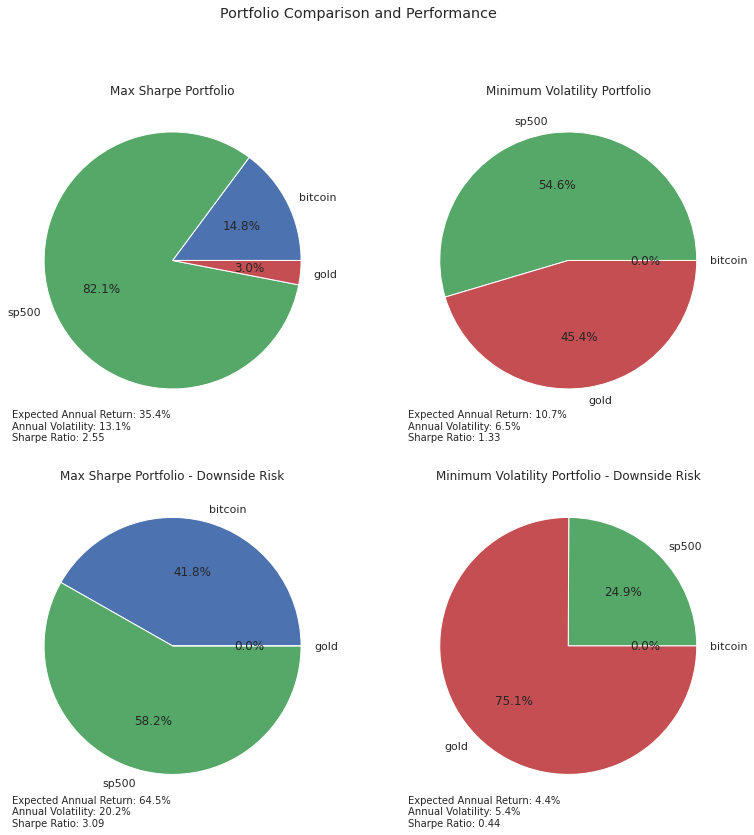

In [174]:
assets = ['bitcoin', 'sp500', 'gold']
maxsharpe_wts = []
minvol_wts = []
maxsharpe_downside_wts = []
minvol_downside_wts = []
for asset in assets:
    maxsharpe_wts.append(maxsharpe_cleaned_weights[asset]) 
    minvol_wts.append(min_vol_cleaned_weights[asset])
    maxsharpe_downside_wts.append(maxsharpe_downside_ew_cleaned_weights_maxsharpe[asset])
    minvol_downside_wts.append(min_vol_downside_cleaned_weights[asset])


fig, axs = plt.subplots(2, 2, figsize=(13,13))
colors = ['#4C72B0', '#55A868', '#C44E52']

fig.suptitle('Portfolio Comparison and Performance')
# Max Sharpe Portfolio
axs[0, 0].pie(maxsharpe_wts, labels=assets, colors=colors, autopct='%.1f%%', pctdistance=0.6, center=[0,0.5])
axs[0,0].set_title('Max Sharpe Portfolio')
axs[0, 0].text(-1.25, -0.9, f'Expected Annual Return: {round(maxsharpe_performance[0]*100,1)}%\nAnnual Volatility: {round(maxsharpe_performance[1]*100,1)}%\nSharpe Ratio: {round(maxsharpe_performance[2],2)}', size='small')

# Minimum Volatility
axs[0, 1].pie(minvol_wts, labels=assets, colors=colors, autopct='%.1f%%', pctdistance=0.6, center=[0,0.5])
axs[0,1].set_title('Minimum Volatility Portfolio')
axs[0, 1].text(-1.25, -0.9, f'Expected Annual Return: {round(min_vol_performance[0]*100,1)}%\nAnnual Volatility: {round(min_vol_performance[1]*100,1)}%\nSharpe Ratio: {round(min_vol_performance[2],2)}', size='small')

# Max Sharpe Portfolio - Downside Risk
axs[1, 0].pie(maxsharpe_downside_wts, labels=assets, colors=colors, autopct='%.1f%%', pctdistance=0.6, center=[0,0.5])
axs[1,0].set_title('Max Sharpe Portfolio - Downside Risk')
axs[1, 0].text(-1.25, -0.9, f'Expected Annual Return: {round(maxsharpe_downside_performance[0]*100,1)}%\nAnnual Volatility: {round(maxsharpe_downside_performance[1]*100,1)}%\nSharpe Ratio: {round(maxsharpe_downside_performance[2],2)}', size='small')

# Minimum Volatility - Downside Risk
axs[1, 1].pie(minvol_downside_wts, labels=assets, colors=colors, autopct='%.1f%%', pctdistance=0.6, center=[0,0.5])
axs[1,1].set_title('Minimum Volatility Portfolio - Downside Risk')
axs[1, 1].text(-1.25, -0.9, f'Expected Annual Return: {round(min_vol_downside_performance[0]*100,1)}%\nAnnual Volatility: {round(min_vol_downside_performance[1]*100,1)}%\nSharpe Ratio: {round(min_vol_downside_performance[2],2)}', size='small')


### 7.3 Portfolio Evaluation

#### 7.3.1 Cumulative Portfolio Returns

The below charts show the comparison of the cumulative returns of each of the considered portfolios. In descending order the cumulative returns are Max Sharpe - Downside Risk 22.4%, Max Sharpe 5.4%, Minimum Volatility 2.0%, and Minimum Volatility - Downside Risk 1.7%.

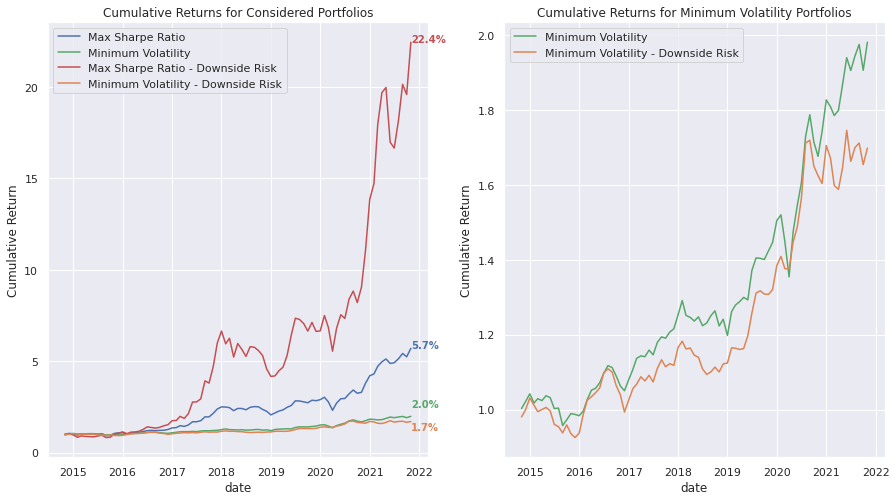

In [175]:
all_returns = pd.DataFrame({
    'bitcoin': bitcoin['close'],
    'sp500': sp500['close'],
    'gold': monthly_data['gold_usd']
})

all_returns.fillna(method='ffill', inplace=True)
all_returns = all_returns.pct_change(freq='MS')
all_returns = all_returns.dropna()

maxsharpe_returns = all_returns.dot(maxsharpe_wts)
minvol_returns = all_returns.dot(minvol_wts)
maxsharpe_downside_returns = all_returns.dot(maxsharpe_downside_wts)
minvol_downside_returns = all_returns.dot(minvol_downside_wts)

portfolio_cum_returns = pd.DataFrame({
    'maxsharpe': (1 + maxsharpe_returns).cumprod(),
    'minvol': (1 + minvol_returns).cumprod(),
    'maxsharpe_downside': (1 + maxsharpe_downside_returns).cumprod(),
    'minvol_downside': (1 + minvol_downside_returns).cumprod()

})

sns.set(style='darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15,8))

cum_return_plot = sns.lineplot(data=portfolio_cum_returns, x='date', y='maxsharpe', color='#4C72B0', ax=axes[0])
cum_return_plot = sns.lineplot(data=portfolio_cum_returns, x='date', y='minvol', color='#55A868', ax=axes[0])
cum_return_plot = sns.lineplot(data=portfolio_cum_returns, x='date', y='maxsharpe_downside', color='#C44E52', ax=axes[0])
cum_return_plot = sns.lineplot(data=portfolio_cum_returns, x='date', y='minvol_downside', color='#DD8452', ax=axes[0])
cum_return_plot.set_title('Cumulative Returns for Considered Portfolios')
cum_return_plot.set_ylabel('Cumulative Return')
cum_return_plot.legend(['Max Sharpe Ratio', 'Minimum Volatility', 'Max Sharpe Ratio - Downside Risk', 'Minimum Volatility - Downside Risk'])
cum_return_plot.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['maxsharpe'][-1], f'{round(portfolio_cum_returns["maxsharpe"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
cum_return_plot.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['minvol'][-1]+0.5, f'{round(portfolio_cum_returns["minvol"][-1],1)}%', size='small', color='#55A868', weight='semibold')
cum_return_plot.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['maxsharpe_downside'][-1], f'{round(portfolio_cum_returns["maxsharpe_downside"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
cum_return_plot.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['minvol_downside'][-1]-0.5, f'{round(portfolio_cum_returns["minvol_downside"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

minvol_cum_return_plot = sns.lineplot(data=portfolio_cum_returns, x='date', y='minvol', color='#55A868', ax=axes[1])
minvol_cum_return_plot = sns.lineplot(data=portfolio_cum_returns, x='date', y='minvol_downside', color='#DD8452', ax=axes[1])
minvol_cum_return_plot.set_title('Cumulative Returns for Minimum Volatility Portfolios')
minvol_cum_return_plot.set_ylabel('Cumulative Return')
minvol_cum_return_plot.legend(['Minimum Volatility', 'Minimum Volatility - Downside Risk'])


#### 7.3.2 Cumulative Returns Start Point Analysis

The portfolio optimization conducted produced expected risk and return based on historic data, however a limitation that exists in that historic returns and risks are not perfect estimates for the inputs of the optimization. The result of this can be weights from the portfolio optimization cannot be guaranteed to be ideal for future performance. Additionally, historic performance does not directly indicate or provide insight on future performance, and the evaluation of historic performance is highly dependent on the time frame evaluated. 

The below plots begin to provide insight into the limitations listed above, by plotting each portfolios cumulative returns using the entire dataset (approximately 7 years), starting 10/1/2016 (approximately 5 years), starting 10/1/2018 (approximately 3 years), and lastly starting 10/1/2020 (approximately 1 year).

During the time period of interest the price of Bitcoin has increased significantly starting at a price of approximately 457 dollars and ending at approximately 60,276 dollars. However, it has yet to be seen if this trend of increasing in price will continue at this magnitude moving into the future. The cumulative return plots for both the max sharpe ratio portfolios (only portfolios that incorporate Bitcoin) show that the cumulative return significantly drop between the 5 year and 3 year evaluation. The similarity in the 7 year/5 year and the 3 year/1 year cumulative returns may indicate that utilizing the historic returns of Bitcoin may over emphasize the potential for future returns as much of the increase in price observed occurred prior to 2019.

The minimum volatility portfolios show a much more consistent increase in the cumulative returns moving form 1 year to 7 years. There is a noticeable increase between the 1 year and 3 year cumulative returns, this highlights that the low volatility portfolios in the longer term have more predictable and consistent returns which is a main benefit of this portfolio type. 

The impact of the individual assets incorporated in the portfolios can be seen in the the asset specific cumulative return plots for the same 4 time periods (the entire dataset and 3 subsets). The cumulative returns for gold highlight its consistency with the 7, 5, 3, and 1 year returns being 1.5%, 1.3%, 1.5%, and 0.9%, respectively. However the Sharpe Ratios for gold are all < 1.0, and the 1 year Sharpe Ratio < 0.0. The S&P 500 cumulative returns show the expected trend of consistently decreasing with decreasing number of years with the 7, 5, 3, and 1 year returns being 2.4%, 2.1%, 1.6%, and 1.3%. The Sharpe Ratios for the 7 and 3 years and < 1.0, however for the 5 and 1 year it is > 1.0 indicating that give certain time periods the the risk of investment in the S&P 500 can be worth the returns seen. The decrease seen between the 5 and 3 year returns is likely due to the sharpe decrease in price observed in 2020. The drastic difference in cumulative return seen for Bitcoin indicate that the risk of an investment in Bitcoin is outweighed by its returns, however the returns of an investment after 2018/2019 may not experience the same performance as the investments prior to 2018/2019, this can be seen by a drop in magnitude in the cumulative from the 7 and 5 year datasets to the 3 and 1 year datasets.

##### 7.3.2.1 Filtered Datasets (1 year, 3 year, 5 year)

In [176]:
all_returns.reset_index(inplace=True)

In [177]:
filtered_1year = all_returns.loc[(all_returns['date'] >= '2020-10-01')]
filtered_1year = filtered_1year.set_index('date')  

filtered_3year = all_returns.loc[(all_returns['date'] >= '2018-10-01')]
filtered_3year = filtered_3year.set_index('date')

filtered_5year = all_returns.loc[(all_returns['date'] >= '2016-10-01')]
filtered_5year = filtered_5year.set_index('date')

In [178]:
all_returns = all_returns.set_index('date')

##### 7.3.2.2 Portfolio Varing Start Point Cumulative Returns

In [179]:
maxsharpe_returns_5yr = filtered_5year.dot(maxsharpe_wts)
minvol_returns_5yr = filtered_5year.dot(minvol_wts)
maxsharpe_downside_returns_5yr = filtered_5year.dot(maxsharpe_downside_wts)
minvol_downside_returns_5yr = filtered_5year.dot(minvol_downside_wts)

portfolio_cum_returns_5yr = pd.DataFrame({
    'maxsharpe': (1 + maxsharpe_returns_5yr).cumprod(),
    'minvol': (1 + minvol_returns_5yr).cumprod(),
    'maxsharpe_downside': (1 + maxsharpe_downside_returns_5yr).cumprod(),
    'minvol_downside': (1 + minvol_downside_returns_5yr).cumprod()

})

maxsharpe_returns_3yr = filtered_3year.dot(maxsharpe_wts)
minvol_returns_3yr = filtered_3year.dot(minvol_wts)
maxsharpe_downside_returns_3yr = filtered_3year.dot(maxsharpe_downside_wts)
minvol_downside_returns_3yr = filtered_3year.dot(minvol_downside_wts)

portfolio_cum_returns_3yr = pd.DataFrame({
    'maxsharpe': (1 + maxsharpe_returns_3yr).cumprod(),
    'minvol': (1 + minvol_returns_3yr).cumprod(),
    'maxsharpe_downside': (1 + maxsharpe_downside_returns_3yr).cumprod(),
    'minvol_downside': (1 + minvol_downside_returns_3yr).cumprod()

})

maxsharpe_returns_1yr = filtered_1year.dot(maxsharpe_wts)
minvol_returns_1yr = filtered_1year.dot(minvol_wts)
maxsharpe_downside_returns_1yr = filtered_1year.dot(maxsharpe_downside_wts)
minvol_downside_returns_1yr = filtered_1year.dot(minvol_downside_wts)

portfolio_cum_returns_1yr = pd.DataFrame({
    'maxsharpe': (1 + maxsharpe_returns_1yr).cumprod(),
    'minvol': (1 + minvol_returns_1yr).cumprod(),
    'maxsharpe_downside': (1 + maxsharpe_downside_returns_1yr).cumprod(),
    'minvol_downside': (1 + minvol_downside_returns_1yr).cumprod()

})

Text(2021-11-01 00:00:00, 0.9876512563552817, '1.0%')

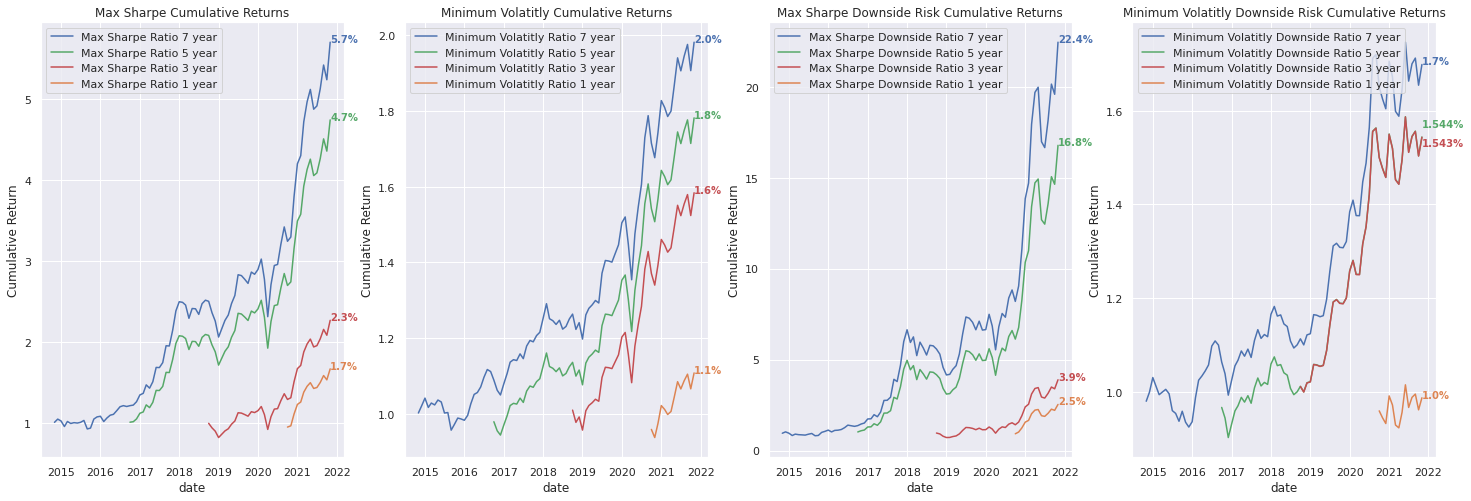

In [180]:
sns.set(style='darkgrid')
fig, axes = plt.subplots(1, 4, figsize=(25,8))

maxsharpe_timeframes = sns.lineplot(data=portfolio_cum_returns, x='date', y='maxsharpe', color='#4C72B0', ax=axes[0])
maxsharpe_timeframes = sns.lineplot(data=portfolio_cum_returns_5yr, x='date', y='maxsharpe', color='#55A868', ax=axes[0])
maxsharpe_timeframes = sns.lineplot(data=portfolio_cum_returns_3yr, x='date', y='maxsharpe', color='#C44E52', ax=axes[0])
maxsharpe_timeframes = sns.lineplot(data=portfolio_cum_returns_1yr, x='date', y='maxsharpe', color='#DD8452', ax=axes[0])
maxsharpe_timeframes.set_title('Max Sharpe Cumulative Returns')
maxsharpe_timeframes.set_ylabel('Cumulative Return')
maxsharpe_timeframes.legend(['Max Sharpe Ratio 7 year', 'Max Sharpe Ratio 5 year', 'Max Sharpe Ratio 3 year', 'Max Sharpe Ratio 1 year'])
maxsharpe_timeframes.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['maxsharpe'][-1], f'{round(portfolio_cum_returns["maxsharpe"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
maxsharpe_timeframes.text(portfolio_cum_returns_5yr.index[-1], portfolio_cum_returns_5yr['maxsharpe'][-1], f'{round(portfolio_cum_returns_5yr["maxsharpe"][-1],1)}%', size='small', color='#55A868', weight='semibold')
maxsharpe_timeframes.text(portfolio_cum_returns_3yr.index[-1], portfolio_cum_returns_3yr['maxsharpe'][-1], f'{round(portfolio_cum_returns_3yr["maxsharpe"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
maxsharpe_timeframes.text(portfolio_cum_returns_1yr.index[-1], portfolio_cum_returns_1yr['maxsharpe'][-1], f'{round(portfolio_cum_returns_1yr["maxsharpe"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

minvol_timeframes = sns.lineplot(data=portfolio_cum_returns, x='date', y='minvol', color='#4C72B0', ax=axes[1])
minvol_timeframes = sns.lineplot(data=portfolio_cum_returns_5yr, x='date', y='minvol', color='#55A868', ax=axes[1])
minvol_timeframes = sns.lineplot(data=portfolio_cum_returns_3yr, x='date', y='minvol', color='#C44E52', ax=axes[1])
minvol_timeframes = sns.lineplot(data=portfolio_cum_returns_1yr, x='date', y='minvol', color='#DD8452', ax=axes[1])
minvol_timeframes.set_title('Minimum Volatitly Cumulative Returns')
minvol_timeframes.set_ylabel('Cumulative Return')
minvol_timeframes.legend(['Minimum Volatitly Ratio 7 year', 'Minimum Volatitly Ratio 5 year', 'Minimum Volatitly Ratio 3 year', 'Minimum Volatitly Ratio 1 year'])
minvol_timeframes.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['minvol'][-1], f'{round(portfolio_cum_returns["minvol"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
minvol_timeframes.text(portfolio_cum_returns_5yr.index[-1], portfolio_cum_returns_5yr['minvol'][-1], f'{round(portfolio_cum_returns_5yr["minvol"][-1],1)}%', size='small', color='#55A868', weight='semibold')
minvol_timeframes.text(portfolio_cum_returns_3yr.index[-1], portfolio_cum_returns_3yr['minvol'][-1], f'{round(portfolio_cum_returns_3yr["minvol"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
minvol_timeframes.text(portfolio_cum_returns_1yr.index[-1], portfolio_cum_returns_1yr['minvol'][-1], f'{round(portfolio_cum_returns_1yr["minvol"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

maxsharpe_ds_timeframes = sns.lineplot(data=portfolio_cum_returns, x='date', y='maxsharpe_downside', color='#4C72B0', ax=axes[2])
maxsharpe_ds_timeframes = sns.lineplot(data=portfolio_cum_returns_5yr, x='date', y='maxsharpe_downside', color='#55A868', ax=axes[2])
maxsharpe_ds_timeframes = sns.lineplot(data=portfolio_cum_returns_3yr, x='date', y='maxsharpe_downside', color='#C44E52', ax=axes[2])
maxsharpe_ds_timeframes = sns.lineplot(data=portfolio_cum_returns_1yr, x='date', y='maxsharpe_downside', color='#DD8452', ax=axes[2])
maxsharpe_ds_timeframes.set_title('Max Sharpe Downside Risk Cumulative Returns')
maxsharpe_ds_timeframes.set_ylabel('Cumulative Return')
maxsharpe_ds_timeframes.legend(['Max Sharpe Downside Ratio 7 year', 'Max Sharpe Downside Ratio 5 year', 'Max Sharpe Downside Ratio 3 year', 'Max Sharpe Downside Ratio 1 year'])
maxsharpe_ds_timeframes.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['maxsharpe_downside'][-1], f'{round(portfolio_cum_returns["maxsharpe_downside"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
maxsharpe_ds_timeframes.text(portfolio_cum_returns_5yr.index[-1], portfolio_cum_returns_5yr['maxsharpe_downside'][-1], f'{round(portfolio_cum_returns_5yr["maxsharpe_downside"][-1],1)}%', size='small', color='#55A868', weight='semibold')
maxsharpe_ds_timeframes.text(portfolio_cum_returns_3yr.index[-1], portfolio_cum_returns_3yr['maxsharpe_downside'][-1], f'{round(portfolio_cum_returns_3yr["maxsharpe_downside"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
maxsharpe_ds_timeframes.text(portfolio_cum_returns_1yr.index[-1], portfolio_cum_returns_1yr['maxsharpe_downside'][-1], f'{round(portfolio_cum_returns_1yr["maxsharpe_downside"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

minvol_ds_timeframes = sns.lineplot(data=portfolio_cum_returns, x='date', y='minvol_downside', color='#4C72B0', ax=axes[3])
minvol_ds_timeframes = sns.lineplot(data=portfolio_cum_returns_5yr, x='date', y='minvol_downside', color='#55A868', ax=axes[3])
minvol_ds_timeframes = sns.lineplot(data=portfolio_cum_returns_3yr, x='date', y='minvol_downside', color='#C44E52', ax=axes[3])
minvol_ds_timeframes = sns.lineplot(data=portfolio_cum_returns_1yr, x='date', y='minvol_downside', color='#DD8452', ax=axes[3])
minvol_ds_timeframes.set_title('Minimum Volatitly Downside Risk Cumulative Returns')
minvol_ds_timeframes.set_ylabel('Cumulative Return')
minvol_ds_timeframes.legend(['Minimum Volatitly Downside Ratio 7 year', 'Minimum Volatitly Downside Ratio 5 year', 'Minimum Volatitly Downside Ratio 3 year', 'Minimum Volatitly Downside Ratio 1 year'])
minvol_ds_timeframes.text(portfolio_cum_returns.index[-1], portfolio_cum_returns['minvol_downside'][-1], f'{round(portfolio_cum_returns["minvol_downside"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
minvol_ds_timeframes.text(portfolio_cum_returns_5yr.index[-1], portfolio_cum_returns_5yr['minvol_downside'][-1]+0.02, f'{round(portfolio_cum_returns_5yr["minvol_downside"][-1],3)}%', size='small', color='#55A868', weight='semibold')
minvol_ds_timeframes.text(portfolio_cum_returns_3yr.index[-1], portfolio_cum_returns_3yr['minvol_downside'][-1]-0.02, f'{round(portfolio_cum_returns_3yr["minvol_downside"][-1],3)}%', size='small', color='#C44E52', weight='semibold')
minvol_ds_timeframes.text(portfolio_cum_returns_1yr.index[-1], portfolio_cum_returns_1yr['minvol_downside'][-1], f'{round(portfolio_cum_returns_1yr["minvol_downside"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

##### 7.3.2.3 Asset Varying Start Point Cumulative Returns

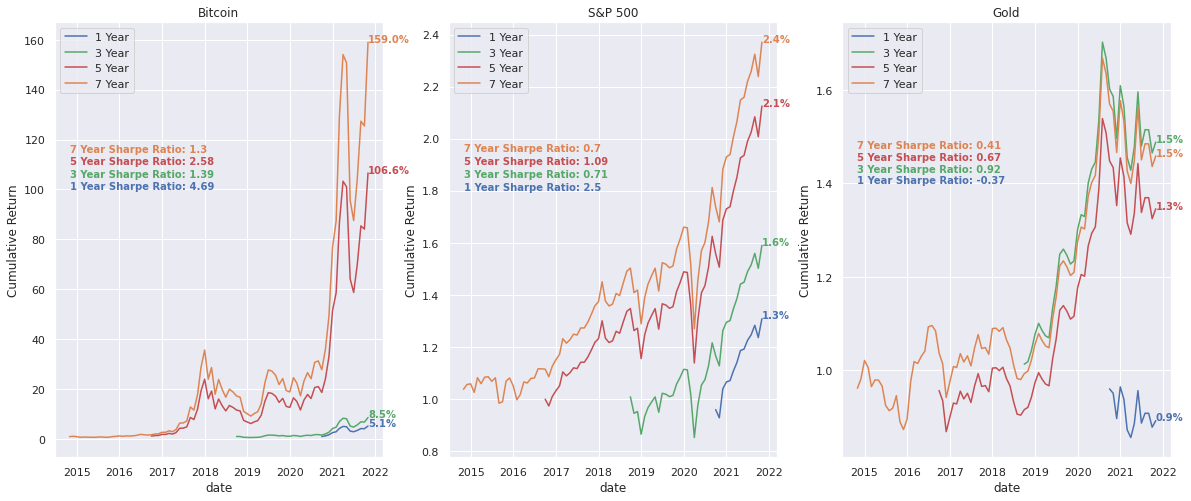

In [212]:
asset_cum_returns = pd.DataFrame({
    'bitcoin_1yr': (1 + filtered_1year['bitcoin']).cumprod(),
    'sp500_1yr': (1 + filtered_1year['sp500']).cumprod(),
    'gold_1yr': (1 + filtered_1year['gold']).cumprod(),
    'bitcoin_3yr': (1 + filtered_3year['bitcoin']).cumprod(),
    'sp500_3yr': (1 + filtered_3year['sp500']).cumprod(),
    'gold_3yr': (1 + filtered_3year['gold']).cumprod(),
    'bitcoin_5yr': (1 + filtered_5year['bitcoin']).cumprod(),
    'sp500_5yr': (1 + filtered_5year['sp500']).cumprod(),
    'gold_5yr': (1 + filtered_5year['gold']).cumprod(),
    'bitcoin_7yr': (1 + all_returns['bitcoin']).cumprod(),
    'sp500_7yr': (1 + all_returns['sp500']).cumprod(),
    'gold_7yr': (1 + all_returns['gold']).cumprod()

})

sns.set(style='darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(20,8))

# Bitcoin
bitcoin_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='bitcoin_1yr', color='#4C72B0', ax=axes[0])
bitcoin_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='bitcoin_3yr', color='#55A868', ax=axes[0])
bitcoin_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='bitcoin_5yr', color='#C44E52', ax=axes[0])
bitcoin_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='bitcoin_7yr', color='#DD8452', ax=axes[0])

bitcoin_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['bitcoin_1yr'][-1], f'{round(asset_cum_returns["bitcoin_1yr"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
bitcoin_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['bitcoin_3yr'][-1], f'{round(asset_cum_returns["bitcoin_3yr"][-1],1)}%', size='small', color='#55A868', weight='semibold')
bitcoin_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['bitcoin_5yr'][-1], f'{round(asset_cum_returns["bitcoin_5yr"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
bitcoin_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['bitcoin_7yr'][-1], f'{round(asset_cum_returns["bitcoin_7yr"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

bitcoin_timeframes.text(asset_cum_returns.index[0], 100, f'1 Year Sharpe Ratio: {round(sharpe(bitcoin["close"].iloc[(bitcoin.index >= "2020-10-01")], 13.56, 365, 0.0),2)}', size='small', color='#4C72B0', weight='semibold')
bitcoin_timeframes.text(asset_cum_returns.index[0], 105, f'3 Year Sharpe Ratio: {round(sharpe(bitcoin["close"].iloc[(bitcoin.index >= "2018-10-01")], 37.56, 365, 0.0),2)}', size='small', color='#55A868', weight='semibold')
bitcoin_timeframes.text(asset_cum_returns.index[0], 110, f'5 Year Sharpe Ratio: {round(sharpe(bitcoin["close"].iloc[(bitcoin.index >= "2016-10-01")], 49.56, 365, 0.0),2)}', size='small', color='#C44E52', weight='semibold')
bitcoin_timeframes.text(asset_cum_returns.index[0], 115, f'7 Year Sharpe Ratio: {round(sharpe(bitcoin["close"], 86.56, 365, 0.0),2)}', size='small', color='#DD8452', weight='semibold')

bitcoin_timeframes.set_title('Bitcoin')
bitcoin_timeframes.set_ylabel('Cumulative Return')
bitcoin_timeframes.legend(['1 Year', '3 Year', '5 Year', '7 Year'])

# S&P 500
sp500_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='sp500_1yr', color='#4C72B0', ax=axes[1])
sp500_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='sp500_3yr', color='#55A868', ax=axes[1])
sp500_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='sp500_5yr', color='#C44E52', ax=axes[1])
sp500_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='sp500_7yr', color='#DD8452', ax=axes[1])

sp500_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['sp500_1yr'][-1], f'{round(asset_cum_returns["sp500_1yr"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
sp500_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['sp500_3yr'][-1], f'{round(asset_cum_returns["sp500_3yr"][-1],1)}%', size='small', color='#55A868', weight='semibold')
sp500_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['sp500_5yr'][-1], f'{round(asset_cum_returns["sp500_5yr"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
sp500_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['sp500_7yr'][-1], f'{round(asset_cum_returns["sp500_7yr"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

sp500_timeframes.text(asset_cum_returns.index[0], 1.8, f'1 Year Sharpe Ratio: {round(sharpe(sp500["close"].iloc[(sp500.index >= "2020-10-01")], 13.56, 250, 0.0),2)}', size='small', color='#4C72B0', weight='semibold')
sp500_timeframes.text(asset_cum_returns.index[0], 1.85, f'3 Year Sharpe Ratio: {round(sharpe(sp500["close"].iloc[(sp500.index >= "2018-10-01")], 37.56, 250, 0.0),2)}', size='small', color='#55A868', weight='semibold')
sp500_timeframes.text(asset_cum_returns.index[0], 1.9, f'5 Year Sharpe Ratio: {round(sharpe(sp500["close"].iloc[(sp500.index >= "2016-10-01")], 49.56, 250, 0.0),2)}', size='small', color='#C44E52', weight='semibold')
sp500_timeframes.text(asset_cum_returns.index[0], 1.95, f'7 Year Sharpe Ratio: {round(sharpe(sp500["close"], 86.56, 250, 0.0),2)}', size='small', color='#DD8452', weight='semibold')

sp500_timeframes.set_title('S&P 500')
sp500_timeframes.set_ylabel('Cumulative Return')
sp500_timeframes.legend(['1 Year', '3 Year', '5 Year', '7 Year'])

# Gold
gold_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='gold_1yr', color='#4C72B0', ax=axes[2])
gold_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='gold_3yr', color='#55A868', ax=axes[2])
gold_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='gold_5yr', color='#C44E52', ax=axes[2])
gold_timeframes = sns.lineplot(data=asset_cum_returns, x='date', y='gold_7yr', color='#DD8452', ax=axes[2])

gold_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['gold_1yr'][-1], f'{round(asset_cum_returns["gold_1yr"][-1],1)}%', size='small', color='#4C72B0', weight='semibold')
gold_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['gold_3yr'][-1], f'{round(asset_cum_returns["gold_3yr"][-1],1)}%', size='small', color='#55A868', weight='semibold')
gold_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['gold_5yr'][-1], f'{round(asset_cum_returns["gold_5yr"][-1],1)}%', size='small', color='#C44E52', weight='semibold')
gold_timeframes.text(asset_cum_returns.index[-1], asset_cum_returns['gold_7yr'][-1], f'{round(asset_cum_returns["gold_7yr"][-1],1)}%', size='small', color='#DD8452', weight='semibold')

gold_timeframes.text(asset_cum_returns.index[0], 1.4, f'1 Year Sharpe Ratio: {round(sharpe(monthly_data["gold_usd"].iloc[(monthly_data.index >= "2020-10-01")], 13.56, 12, 0.0),2)}', size='small', color='#4C72B0', weight='semibold')
gold_timeframes.text(asset_cum_returns.index[0], 1.425, f'3 Year Sharpe Ratio: {round(sharpe(monthly_data["gold_usd"].iloc[(monthly_data.index >= "2018-10-01")], 37.56, 12, 0.0),2)}', size='small', color='#55A868', weight='semibold')
gold_timeframes.text(asset_cum_returns.index[0], 1.45, f'5 Year Sharpe Ratio: {round(sharpe(monthly_data["gold_usd"].iloc[(monthly_data.index >= "2016-10-01")], 49.56, 12, 0.0),2)}', size='small', color='#C44E52', weight='semibold')
gold_timeframes.text(asset_cum_returns.index[0], 1.475, f'7 Year Sharpe Ratio: {round(sharpe(monthly_data["gold_usd"], 86.56, 12, 0.0),2)}', size='small', color='#DD8452', weight='semibold')

gold_timeframes.set_title('Gold')
gold_timeframes.set_ylabel('Cumulative Return')
gold_timeframes.legend(['1 Year', '3 Year', '5 Year', '7 Year'])
